https://leetcode.com/problems/number-of-islands/description/

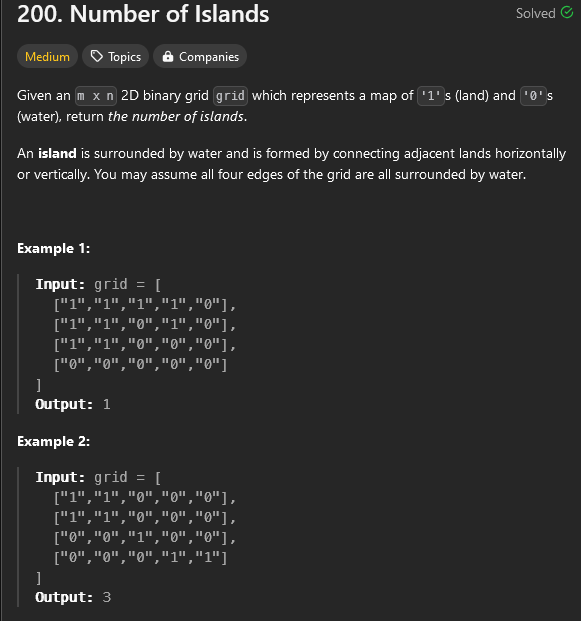

In [ ]:
'''
Unsure of origin solve
'''

def numIslands(grid):
        if not grid:
            return 0

        rows, cols = len(grid), len(grid[0])
        count = 0

        def dfs(r, c):
            if r < 0 or c < 0 or r >= rows or c >= cols or grid[r][c] == '0':
                return
            grid[r][c] = '0'  # Mark as visited
            dfs(r + 1, c)
            dfs(r - 1, c)
            dfs(r, c + 1)
            dfs(r, c - 1)

        for i in range(rows):
            for j in range(cols):
                if grid[i][j] == '1':
                    count += 1
                    dfs(i, j)

        return count

**PseudoCode for Solution**

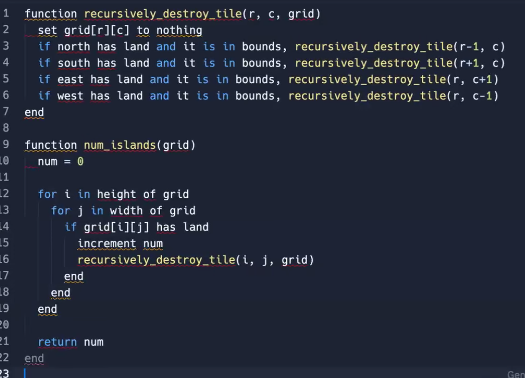

In [ ]:
'''
Codepath solution
Idea:
1. visit each tile on the grid, if that tile is 1 (island), 
set it to 0 and then dfs to N,S,E,W until all tiles have been visited

2. increment the count each time a new island is discovered
    - meaning that a dfs was completed and then a new dfs started
'''

def in_bounds(r,c, grid):
    HEIGHT = len(grid)
    WIDTH = len(grid[0])
    
    if (0 <= r < HEIGHT) and (0 <= c < WIDTH):
        return True 
    else:
        return False
    

def destroy_tile(r, c, grid):
    NORTH = [r-1,c]
    SOUTH = [r+1,c]
    EAST = [r,c+1]
    WEST = [r,c-1]
    
    grid[r][c] = '0'
    for direction in [NORTH, SOUTH, EAST, WEST]:
        i, j = direction
        
        # if is in bounds and direction has land, 
        # recursively call destroy all tiles connected  
        if in_bounds(i,j) and grid[i][j] == '1':
            destroy_tile(i, j, grid)
        

def solution(grid):
    island_num = 0
    HEIGHT = len(grid)
    WIDTH = len(grid[0])
    
    for i in range(HEIGHT):
        for j in range(WIDTH):
            if grid[i][j] == '1':
                island_num += 1
                destroy_tile(i, j, grid)
    
    return island_num

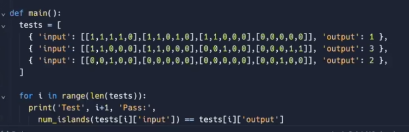

**Solution for max island area**

In [ ]:
'''
Codepath solution
Idea:
1. visit each tile on the grid, if that tile is 1 (island), 
set it to 0 and then dfs to N,S,E,W until all tiles have been visited

2. increment the count each time a new island is discovered
    - meaning that a dfs was completed and then a new dfs started
'''

def in_bounds(r,c, grid):
    HEIGHT = len(grid)
    WIDTH = len(grid[0])
    
    if (0 <= r < HEIGHT) and (0 <= c < WIDTH):
        return True 
    

def destroy_tile(r, c, grid):
    NORTH = [r-1,c]
    SOUTH = [r+1,c]
    EAST = [r,c+1]
    WEST = [r,c-1]
    
    grid[r][c] = 0
    area = 1
    
    for direction in [NORTH, SOUTH, EAST, WEST]:
        i, j = direction
        
        # if is in bounds and direction has land, 
        # recursively call destroy all tiles connected  
        if in_bounds(i,j, grid) and grid[i][j] == 1:
            area += destroy_tile(i, j, grid)
    
    return area

def max_area(grid):
    max_area = 0
    HEIGHT = len(grid)
    WIDTH = len(grid[0])
    
    for i in range(HEIGHT):
        for j in range(WIDTH):
            if grid[i][j] == 1:
                area = destroy_tile(i, j, grid)
                if area > max_area: max_area = area
    
    return max_area